In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))
lc = lc.remove_outliers(4)
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

In [4]:
star = pb.star(kic, pg, 
                   numax, dnu, teff, bp_rp, 
                   store_chains=True, 
                   nthreads=4)

In [5]:
star.run_epsilon()

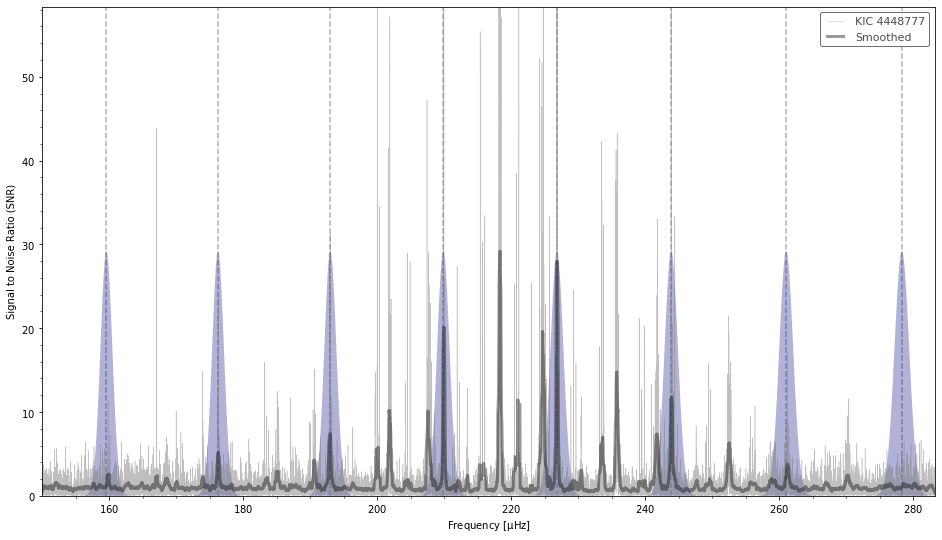

In [6]:
star.epsilon.plot(pg);

In [7]:
star.run_asy_peakbag(norders=7)

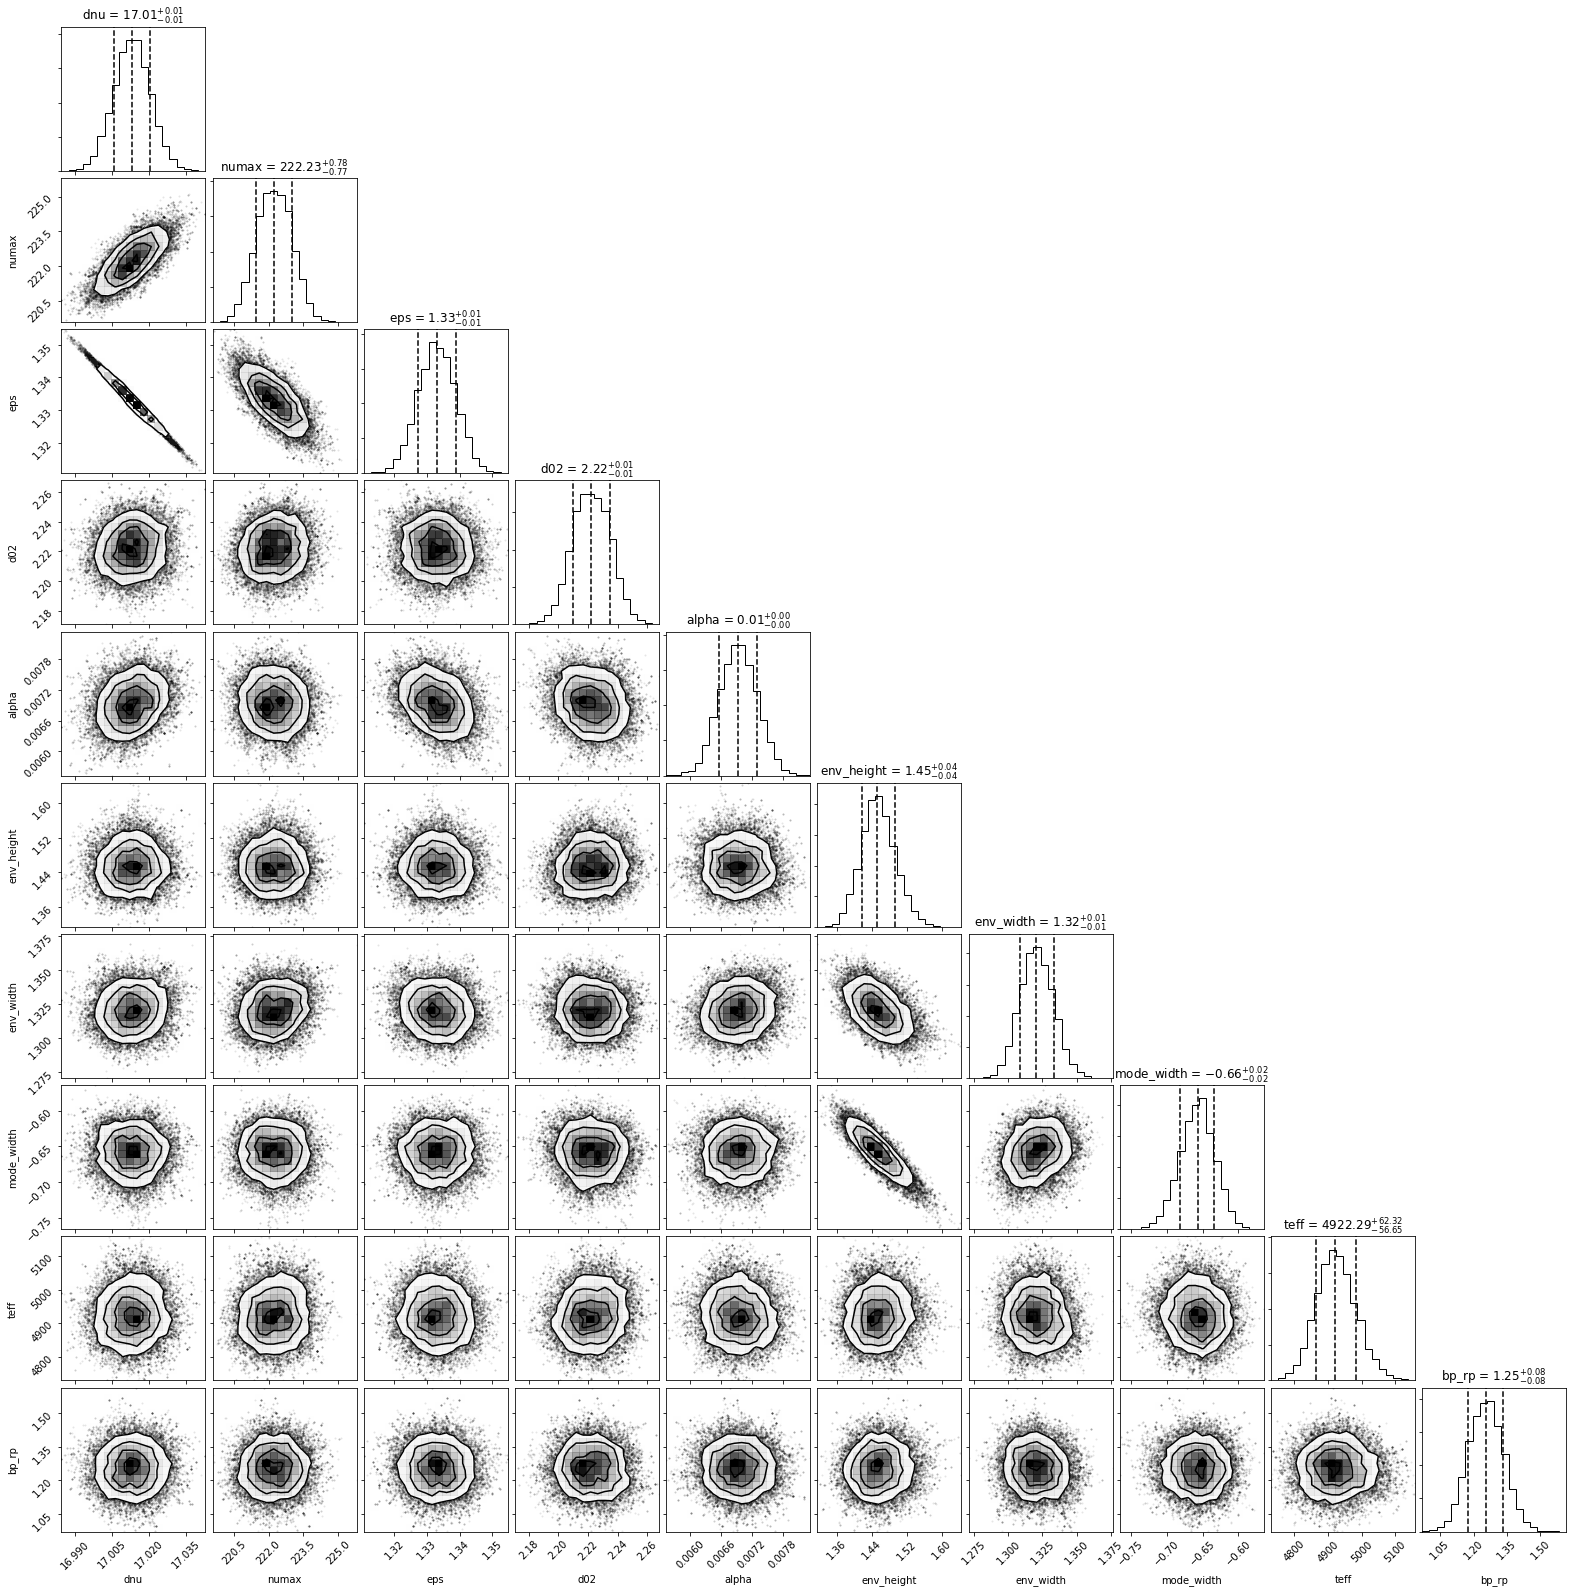

In [8]:
star.asy_fit.plot_corner();

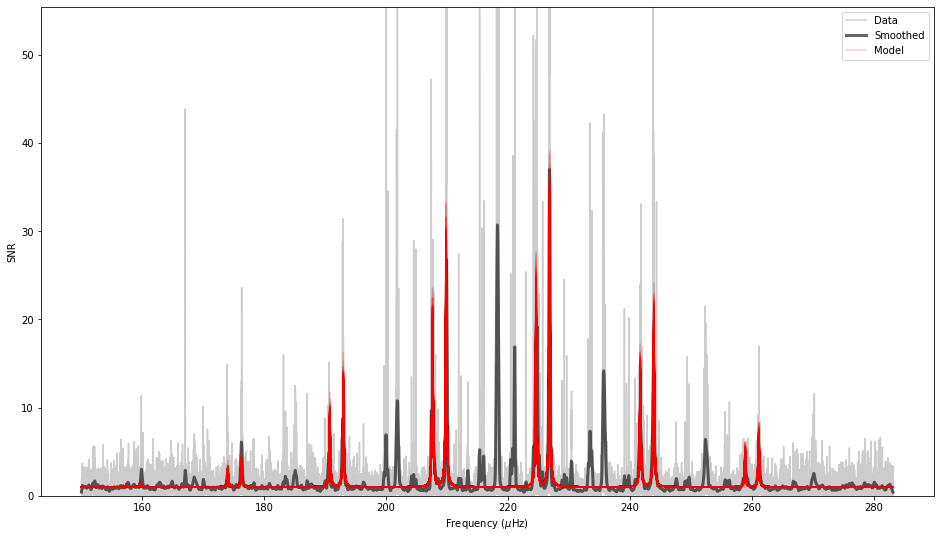

In [9]:
star.asy_fit.plot();

In [10]:
star.peakbag = pb.peakbag(star.f, star.s, star.asy_result)

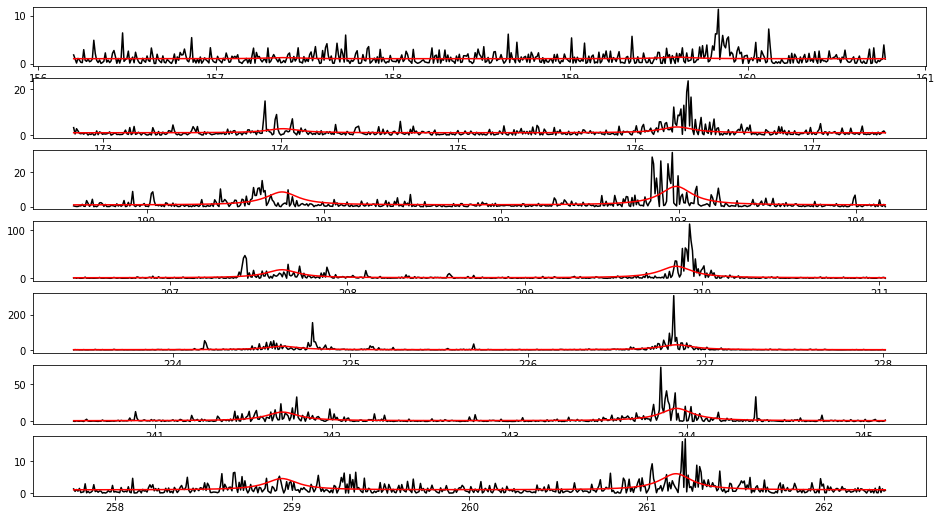

In [11]:
star.peakbag.plot_start_model();

In [12]:
star.run_peakbag()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [03:47<00:00, 35.22draws/s]
The acceptance probability does not match the target. It is 0.6703254919054645, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6986835818694778, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8794023720490397, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 

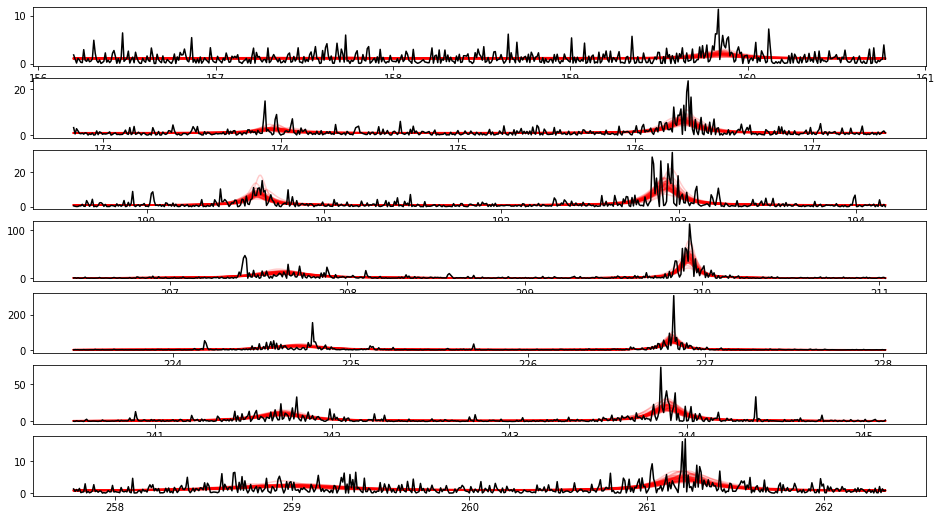

In [13]:
star.peakbag.plot_fit(thin=10);